# Correlation

In [1]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir("/content/drive/MyDrive/Projects/Pakkanodi Assignments/TV News channel dataset")

input_folder = "data/"
output_folder = "processed_data/"

channels = ["BBC", "CNN", "TIMESNOW", "CNNIBN", "NDTV"]
channel = channels[0]

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(r""+output_folder+channel+"/"+channel+'.csv')

In [ ]:
df.corr()

,index,target,qid,2,3,4,5,6,7,8,...,924,959,1002,1016,1028,1048,1112,1119,4124,4125
index,1.000000,-0.153418,NaN,-0.090045,-0.081360,-0.123409,-0.125608,-0.042506,0.008523,-0.008463,...,0.059840,0.035461,-0.006769,0.002056,0.001242,0.014152,-0.004768,-0.005934,-0.008362,0.008400
target,-0.153418,1.000000,NaN,0.079897,0.162799,0.153868,0.242873,0.203636,-0.064939,0.136570,...,-0.250545,-0.171598,0.057409,0.037412,-0.031896,-0.114388,-0.008795,0.026093,0.005264,0.001783
qid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.090045,0.079897,NaN,1.000000,0.826758,0.815325,0.516196,0.382333,0.381260,0.340064,...,0.083591,0.106836,0.057134,0.043024,0.032504,0.089336,0.021733,0.042500,-0.001274,-0.003680
3,-0.081360,0.162799,NaN,0.826758,1.000000,0.720928,0.631291,0.377092,0.346476,0.337013,...,0.051081,0.087497,0.066256,0.047783,0.029300,0.073947,0.014538,0.041328,-0.002018,0.005974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.014152,-0.114388,NaN,0.089336,0.073947,0.079263,0.030871,0.065202,0.247816,0.306591,...,0.167775,0.084630,0.168371,0.134890,-0.014578,1.000000,0.146773,-0.009409,-0.004802,0.007020
1112,-0.004768,-0.008795,NaN,0.021733,0.014538,0.013353,-0.003369,0.006583,0.067749,0.143117,...,0.059182,0.053836,0.018696,0.046026,-0.005481,0.146773,1.000000,-0.001953,-0.004875,0.003877
1119,-0.005934,0.026093,NaN,0.042500,0.041328,0.036282,0.026523,-0.014446,0.013096,-0.000525,...,-0.010373,-0.012374,-0.012886,-0.003643,0.004190,-0.009409,-0.001953,1.000000,0.005991,-0.000596
4124,-0.008362,0.005264,NaN,-0.001274,-0.002018,0.002102,0.000667,0.002266,0.000734,0.000437,...,0.002562,0.001497,0.000790,-0.021113,0.008040,-0.004802,-0.004875,0.005991,1.000000,-0.013181


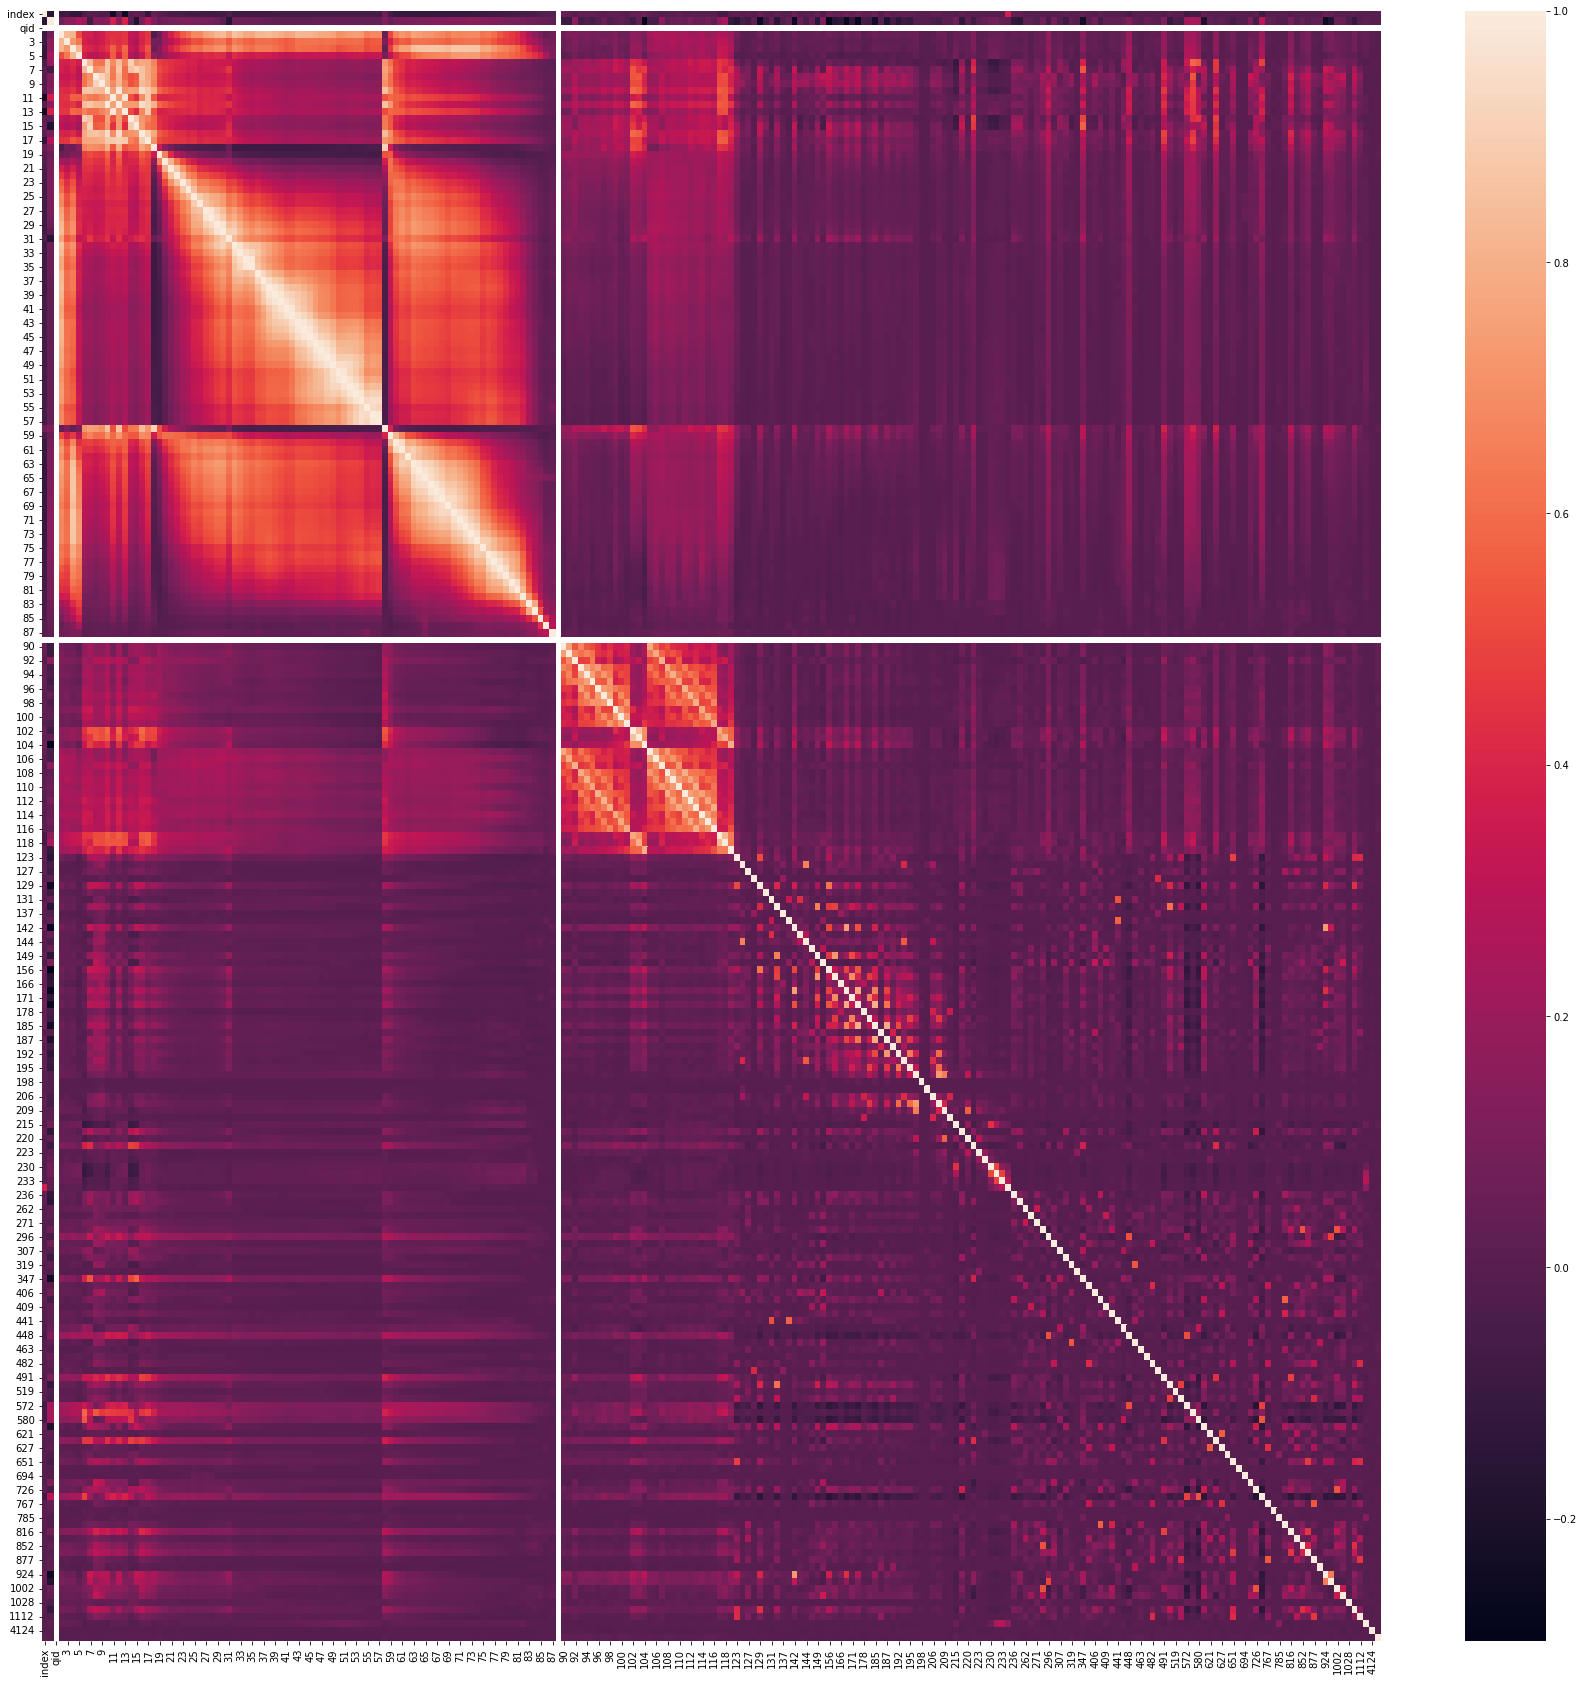

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr());

In [ ]:
# plt.figure(figsize=(16, 16))
# heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# # plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')




In [ ]:
# plt.figure(figsize=(16, 16))
# heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Lasso

In [4]:
# https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [5]:

X, y = df.iloc[:,2:].to_numpy(), df.target.replace(-1, 0).to_numpy()

features = list(df.columns[2:])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [8]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=1
                      )

In [9]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [10]:
search.best_params_# {'model__alpha': 1.2000000000000002}

{'model__alpha': 0.1}

In [11]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [12]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10161963, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
lasso_features = np.array(features)[importance > 0]
lasso_features

array(['13', '104', '142', '156', '176', '347', '762', '924'], dtype='<U4')

## Feature Selection

In [23]:

# X, y = df.iloc[:,2:].to_numpy(), df.target.replace(-1, 0).to_numpy()

lasso_X, y = df.loc[:, np.array(features)[importance > 0]], df.target.replace(-1, 0).to_numpy()

lasso_X_train, lasso_X_test, y_train, y_test = train_test_split(lasso_X, y, test_size=0.20, random_state=42)
lasso_X_train, lasso_X_val, y_train, y_val = train_test_split(lasso_X_train, y_train, test_size=0.20, random_state=42)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

lasso_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

lasso_svm_model.fit(lasso_X_train, y_train)


print("Accuracy : {:.2f} %".format(lasso_svm_model.score(lasso_X_val, y_val)*100))

Accuracy : 82.37 %


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

svm_model.fit(X_train, y_train)

print("Accuracy : {:.2f} %".format(svm_model.score(X_val, y_val)*100))

Accuracy : 86.46 %


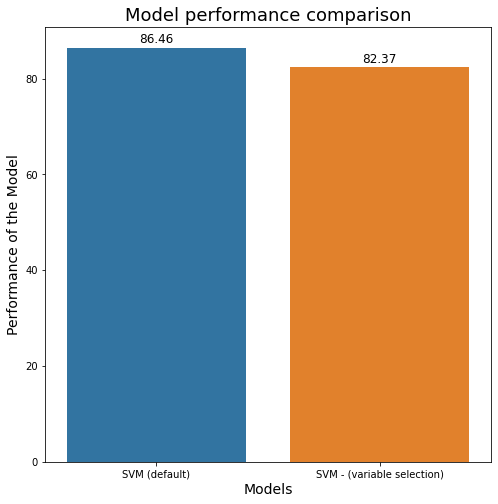

In [26]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['SVM (default)', 'SVM - (variable selection)'],
        "Accuracy": [svm_model.score(X_val, y_val)*100, 
                     lasso_svm_model.score(lasso_X_val, y_val)*100, ]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=14)
 
# Setting the label for y-axis
plt.ylabel("Performance of the Model", size=14)

# Setting the title for the graph
plt.title("Model performance comparison", size=18)

# Finally showing the plot
plt.show()

In [27]:
# we have reduced 96.7% of the input features
# Yet the performance (accuracy) has been effected by only 4%
# BUt in result, the model size and computation power are drastically reduced.

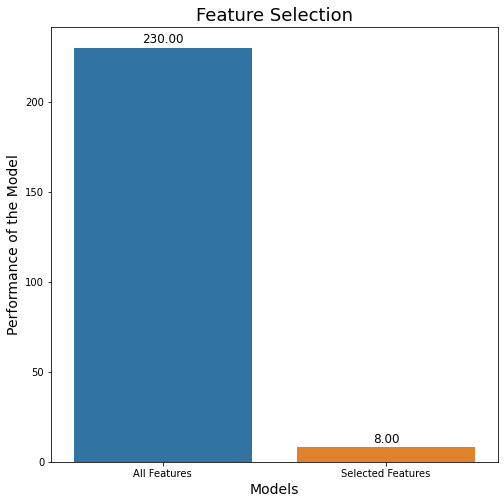

In [21]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['All Features', 'Selected Features'],
        "Accuracy": [len(features), 
                     len(lasso_features), ]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=14)
 
# Setting the label for y-axis
plt.ylabel("Performance of the Model", size=14)

# Setting the title for the graph
plt.title("Feature Selection", size=18)

# Finally showing the plot
plt.show()